In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from topsis import Topsis


# ZACHARY Graph

In [3]:
Graph = nx.read_edgelist('DataZachary/ZACHARY.txt',create_using=nx.Graph(),nodetype=int)

print(nx.info(Graph))

Graph with 15 nodes and 30 edges


C:\Users\DELL\AppData\Local\Temp\ipykernel_12468\361272412.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(Graph))


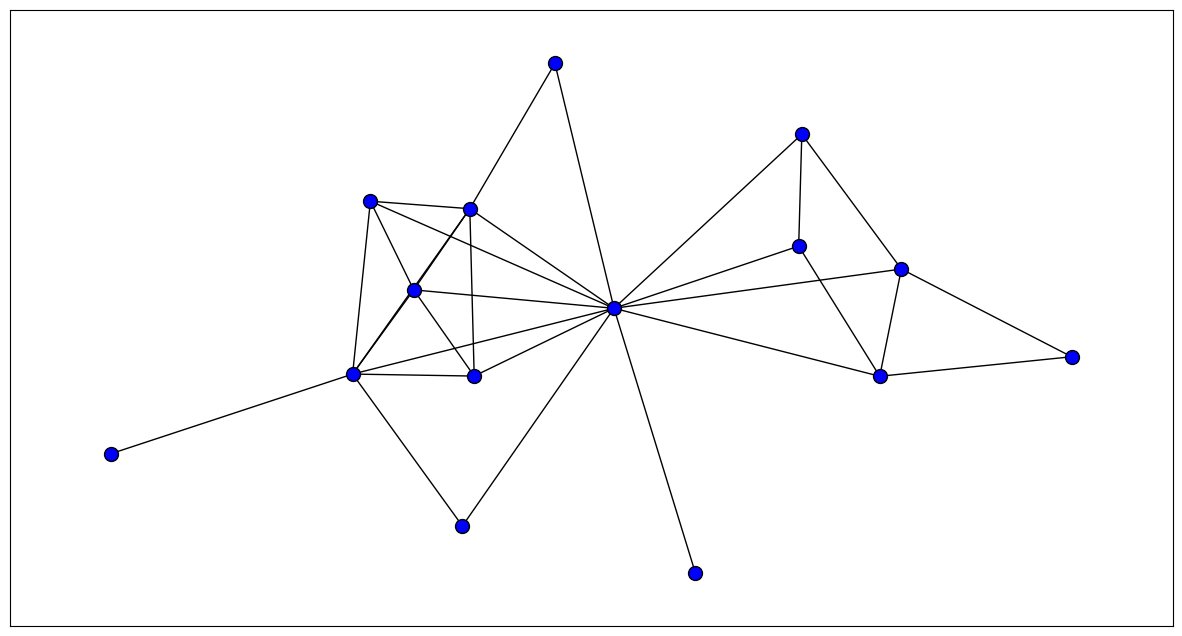

In [4]:
sp = nx.spring_layout(Graph)
plt.rcParams.update({'figure.figsize': (15, 8)})
nx.draw_networkx(Graph,pos=sp,node_color='blue',with_labels=False,edgecolors='black',node_size=100)
plt.show()

# Centrality measures

In [5]:
print(nx.degree_centrality(Graph))

{1: 0.8571428571428571, 2: 0.3571428571428571, 3: 0.5, 4: 0.42857142857142855, 5: 0.21428571428571427, 6: 0.2857142857142857, 7: 0.2857142857142857, 8: 0.2857142857142857, 9: 0.14285714285714285, 10: 0.07142857142857142, 11: 0.21428571428571427, 12: 0.07142857142857142, 13: 0.14285714285714285, 14: 0.2857142857142857, 17: 0.14285714285714285}


In [6]:
print(nx.betweenness_centrality(Graph))

{1: 0.6529304029304029, 2: 0.0027472527472527475, 3: 0.1675824175824176, 4: 0.030219780219780223, 5: 0.003663003663003663, 6: 0.06959706959706961, 7: 0.0695970695970696, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.003663003663003663, 12: 0.0, 13: 0.0, 14: 0.0, 17: 0.0}


In [7]:
print(nx.closeness_centrality(Graph))

{1: 0.875, 2: 0.5833333333333334, 3: 0.6363636363636364, 4: 0.6086956521739131, 5: 0.5384615384615384, 6: 0.56, 7: 0.56, 8: 0.56, 9: 0.5185185185185185, 10: 0.4, 11: 0.5384615384615384, 12: 0.4827586206896552, 13: 0.5, 14: 0.56, 17: 0.3888888888888889}


In [8]:
print(nx.eigenvector_centrality(Graph))

{1: 0.5072749582224558, 2: 0.34230406396962304, 3: 0.3790058987986012, 4: 0.36768381124856037, 5: 0.1528450005872546, 6: 0.1641330073111223, 7: 0.1641330073111223, 8: 0.2960015572538102, 9: 0.16434625567638753, 10: 0.0702802562117775, 11: 0.1528450005872546, 12: 0.09406599946461001, 13: 0.16224677870065024, 14: 0.2960015572538102, 17: 0.06087226108372511}


# Build the Evaluation Matrix

In [10]:
    betCent = nx.betweenness_centrality(Graph)
    closCent = nx.closeness_centrality(Graph)
    degCent = nx.degree_centrality(Graph)
    eigCent = nx.eigenvector_centrality(Graph)


    BC = []
    DC = []
    EC = []
    CC = []
    Node = []

    for i in sorted(betCent):
        BC.append(betCent[i])
        Node.append(i)

    for i in sorted(closCent):
        CC.append(closCent[i])

    for i in sorted(degCent):
        DC.append(degCent[i])

    for i in sorted(eigCent):
        EC.append(eigCent[i])

   
    Matrix = pd.DataFrame({'Node' : Node,
                        'DC' : DC,
                        'CC' : CC,
                        'BC' : BC,
                        'EC' : EC})
    Matrix

,Node,DC,CC,BC,EC
0,1,0.857143,0.875000,0.652930,0.507275
1,2,0.357143,0.583333,0.002747,0.342304
2,3,0.500000,0.636364,0.167582,0.379006
3,4,0.428571,0.608696,0.030220,0.367684
4,5,0.214286,0.538462,0.003663,0.152845
5,6,0.285714,0.560000,0.069597,0.164133
6,7,0.285714,0.560000,0.069597,0.164133
7,8,0.285714,0.560000,0.000000,0.296002
8,9,0.142857,0.518519,0.000000,0.164346
9,10,0.071429,0.400000,0.000000,0.070280


In [11]:
# Save the Matrix as a csv file
Matrix.to_csv("DataZachary/Matrix.csv", index=False)

In [12]:
# Convert Matrix to numpy array
Matrix_arr= Matrix[['DC','BC','CC','EC']].to_numpy()

Matrix_arr

array([[0.85714286, 0.6529304 , 0.875     , 0.50727496],
       [0.35714286, 0.00274725, 0.58333333, 0.34230406],
       [0.5       , 0.16758242, 0.63636364, 0.3790059 ],
       [0.42857143, 0.03021978, 0.60869565, 0.36768381],
       [0.21428571, 0.003663  , 0.53846154, 0.152845  ],
       [0.28571429, 0.06959707, 0.56      , 0.16413301],
       [0.28571429, 0.06959707, 0.56      , 0.16413301],
       [0.28571429, 0.        , 0.56      , 0.29600156],
       [0.14285714, 0.        , 0.51851852, 0.16434626],
       [0.07142857, 0.        , 0.4       , 0.07028026],
       [0.21428571, 0.003663  , 0.53846154, 0.152845  ],
       [0.07142857, 0.        , 0.48275862, 0.094066  ],
       [0.14285714, 0.        , 0.5       , 0.16224678],
       [0.28571429, 0.        , 0.56      , 0.29600156],
       [0.14285714, 0.        , 0.38888889, 0.06087226]])

# Call Topsis class 

In [13]:
# Decision Matrix
Evaluation_matrix = Matrix_arr

In [14]:
weights = [0.2, 0.3 , 0.3, 0.2]

criteria = np.array([True,True,True,True])

T = Topsis(Evaluation_matrix,weights,criteria)
T.calc()

Step 1
 [[0.85714286 0.6529304  0.875      0.50727496]
 [0.35714286 0.00274725 0.58333333 0.34230406]
 [0.5        0.16758242 0.63636364 0.3790059 ]
 [0.42857143 0.03021978 0.60869565 0.36768381]
 [0.21428571 0.003663   0.53846154 0.152845  ]
 [0.28571429 0.06959707 0.56       0.16413301]
 [0.28571429 0.06959707 0.56       0.16413301]
 [0.28571429 0.         0.56       0.29600156]
 [0.14285714 0.         0.51851852 0.16434626]
 [0.07142857 0.         0.4        0.07028026]
 [0.21428571 0.003663   0.53846154 0.152845  ]
 [0.07142857 0.         0.48275862 0.094066  ]
 [0.14285714 0.         0.5        0.16224678]
 [0.28571429 0.         0.56       0.29600156]
 [0.14285714 0.         0.38888889 0.06087226]]

Step 2
 [[0.64142698 0.9574654  0.4002657  0.50727496]
 [0.26726124 0.00402861 0.2668438  0.34230406]
 [0.37416574 0.24574498 0.29110233 0.3790059 ]
 [0.32071349 0.04431467 0.27844571 0.36768381]
 [0.16035675 0.00537147 0.24631736 0.152845  ]
 [0.21380899 0.10205802 0.25617005 0.16413

# Determin S+ and S-

In [15]:
# S+ and S-
print("best_distance\t", T.best_distance)
print("worst_distance\t", T.worst_distance)

best_distance	 [0.         0.30017411 0.224002   0.28508824 0.31304701 0.28239657
 0.28239657 0.30573692 0.31785606 0.32897261 0.31304701 0.3256722
 0.31834786 0.30573692 0.3261235 ]
worst_distance	 [0.32978256 0.07556615 0.12145457 0.08780172 0.0349204  0.05425794
 0.05425794 0.0615745  0.02930921 0.00242188 0.0349204  0.01449213
 0.02752936 0.0615745  0.01069045]


In [16]:
print("worst_similarity\t", T.worst_similarity)
print("rank_to_worst_similarity\t", T.rank_to_worst_similarity())

worst_similarity	 [1.         0.20111272 0.35157696 0.2354628  0.10035536 0.16116803
 0.16116803 0.16763568 0.08442437 0.00730814 0.10035536 0.04260332
 0.07959286 0.16763568 0.03173993]
rank_to_worst_similarity	 [10, 15, 12, 13, 9, 5, 11, 6, 7, 8, 14, 2, 4, 3, 1]


In [17]:
print("best_similarity\t", T.best_similarity)
print("rank_to_best_similarity\t", T.rank_to_best_similarity())

best_similarity	 [0.         0.79888728 0.64842304 0.7645372  0.89964464 0.83883197
 0.83883197 0.83236432 0.91557563 0.99269186 0.89964464 0.95739668
 0.92040714 0.83236432 0.96826007]
rank_to_best_similarity	 [1, 3, 4, 2, 8, 14, 6, 7, 5, 11, 9, 13, 12, 15, 10]


In [18]:
#Convert S+ and S- to array numpy
Best_Dist = np.array(T.best_distance)
Worst_Dist = np.array(T.worst_distance)

#print(type(Best_Dist))
#print(len(Best_Dist))

# Calculate Closness 

In [19]:
Closnness = []
Closnness = Worst_Dist / (Worst_Dist + Best_Dist)

In [20]:
Closnness
#print(len(Closnness))

array([1.        , 0.20111272, 0.35157696, 0.2354628 , 0.10035536,
       0.16116803, 0.16116803, 0.16763568, 0.08442437, 0.00730814,
       0.10035536, 0.04260332, 0.07959286, 0.16763568, 0.03173993])

In [21]:
#Convert S+, S- and Closnness to DataFrame 
Worst_Distance = pd.DataFrame(Worst_Dist,columns=['S-'])
Best_Distance = pd.DataFrame(Best_Dist,columns=['S+'])
Clos = pd.DataFrame(Closnness,columns=['C'])

In [22]:
# Concatenate results
Out = pd.concat([Best_Distance, Worst_Distance, Clos], axis=1)
Out

,S+,S-,C
0,0.000000,0.329783,1.000000
1,0.300174,0.075566,0.201113
2,0.224002,0.121455,0.351577
3,0.285088,0.087802,0.235463
4,0.313047,0.034920,0.100355
5,0.282397,0.054258,0.161168
6,0.282397,0.054258,0.161168
7,0.305737,0.061575,0.167636
8,0.317856,0.029309,0.084424
9,0.328973,0.002422,0.007308


In [23]:
#sort DataFrame by Closnness Column (Descending)
Out = Out.sort_values(by="C",ascending=False)
Out

# Save it into a csv file (out.csv)
Out.to_csv("DataZachary/Out.csv",index=False)

In [24]:
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]

In [25]:
#Call the function Ranking_closness
C = ranking_closness(Closnness)
C

[0, 2, 3, 1, 13, 7, 6, 5, 10, 4, 8, 12, 11, 14, 9]

In [26]:
#retrieve the nodes that correspond to the indices returned by the function above
Tab = []
for i in range(len(C)):
       Tab.append(Matrix['Node'].loc[C[i]])
        
Tab

[1, 3, 4, 2, 14, 8, 7, 6, 11, 5, 9, 13, 12, 17, 10]

In [27]:
#Convert Tab above to DataFrame 
Tab_Data=pd.DataFrame(Tab,columns=["Node"])

Tab_Data["Node"].to_csv("DataZachary/Topsis.csv",index=False)

# The nodes depending on the relative closeness to the ideal solution

In [28]:
Final_Tab = pd.concat([pd.read_csv("DataZachary/Out.csv"),Tab_Data],axis=1)

Final_Tab.head(10)

,S+,S-,C,Node
0,0.000000,0.329783,1.000000,1
1,0.224002,0.121455,0.351577,3
2,0.285088,0.087802,0.235463,4
3,0.300174,0.075566,0.201113,2
4,0.305737,0.061575,0.167636,14
5,0.305737,0.061575,0.167636,8
6,0.282397,0.054258,0.161168,7
7,0.282397,0.054258,0.161168,6
8,0.313047,0.034920,0.100355,11
9,0.313047,0.034920,0.100355,5


In [29]:
res = pd.concat([pd.read_csv("DataZachary/Matrix.csv"),pd.read_csv("DataZachary/Out.csv")],axis=1)
res

,Node,DC,CC,BC,EC,S+,S-,C
0,1,0.857143,0.875000,0.652930,0.507275,0.000000,0.329783,1.000000
1,2,0.357143,0.583333,0.002747,0.342304,0.224002,0.121455,0.351577
2,3,0.500000,0.636364,0.167582,0.379006,0.285088,0.087802,0.235463
3,4,0.428571,0.608696,0.030220,0.367684,0.300174,0.075566,0.201113
4,5,0.214286,0.538462,0.003663,0.152845,0.305737,0.061575,0.167636
5,6,0.285714,0.560000,0.069597,0.164133,0.305737,0.061575,0.167636
6,7,0.285714,0.560000,0.069597,0.164133,0.282397,0.054258,0.161168
7,8,0.285714,0.560000,0.000000,0.296002,0.282397,0.054258,0.161168
8,9,0.142857,0.518519,0.000000,0.164346,0.313047,0.034920,0.100355
9,10,0.071429,0.400000,0.000000,0.070280,0.313047,0.034920,0.100355


In [30]:
# Save the res as a csv file
res.to_csv("DataZachary/res.csv", index=False)

# User

In [31]:
K = int(input("Enter the number of the top influential nodes:"))

for i in range(K):
    print("The",i+1,"top influential node is ",Final_Tab["Node"][i])

Enter the number of the top influential nodes:10
The 1 top influential node is  1
The 2 top influential node is  3
The 3 top influential node is  4
The 4 top influential node is  2
The 5 top influential node is  14
The 6 top influential node is  8
The 7 top influential node is  7
The 8 top influential node is  6
The 9 top influential node is  11
The 10 top influential node is  5
